In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

### Discrete-Time Signal
- 이번 실습에서는 파이썬을 이용하여 discrete-time signal을 다루어보는 연습을 하겠습니다.
- 우리는 유한한 샘플에 대해 디스플레이를 할 수 있으므로, -N부터 N까지의 정수 index n을 정의하겠습니다.

In [2]:
N = 20
n = np.arange(-N,N+1)
print(n)

[-20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3
  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20]


In [3]:
def xn(n):
    x = 10-np.abs(n)
    x[n>=5] = 5
    x[np.abs(n)>10]=0
    return x

- 간단한 discrete-time signal x[n] = n 을 정의하여 stem함수를 이용하여 시각화해봅니다.

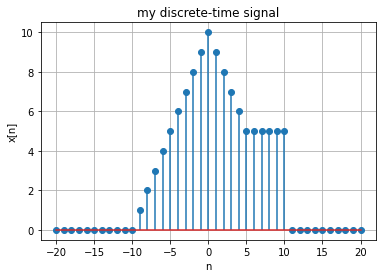

In [4]:
x = xn(n)
plt.stem(n,x)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('my discrete-time signal')
plt.grid('on')
plt.show()

### Elementary Signal Transformation
- 정의한 신호들에 대해 time shift, time scaling, time reversal 등을 진행해봅니다.

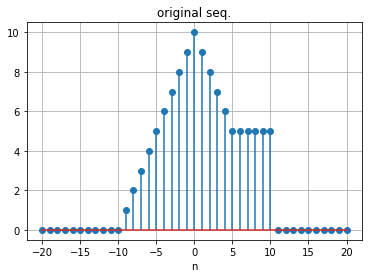

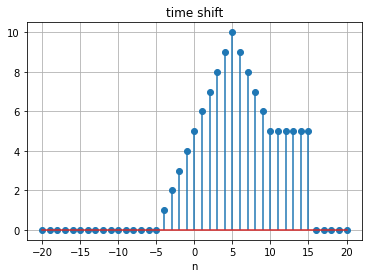

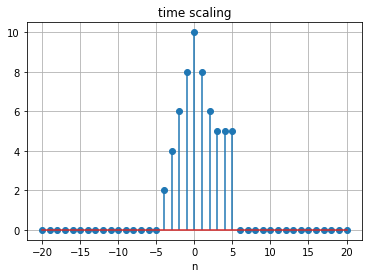

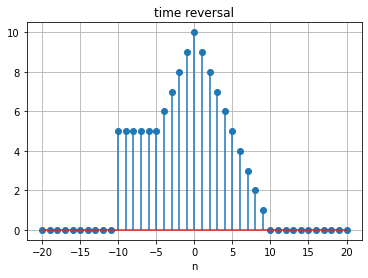

In [5]:

plt.stem(n,xn(n))
plt.xlabel('n')
plt.title('original seq.')
plt.grid('on')
plt.show()

plt.stem(n,xn(n-5))
plt.xlabel('n')
plt.title('time shift')
plt.grid('on')
plt.show()

plt.stem(n,xn(2*n))
plt.xlabel('n')
plt.title('time scaling')
plt.grid('on')
plt.show()

plt.stem(n,xn(-n))
plt.xlabel('n')
plt.title('time reversal')
plt.grid('on')
plt.show()

- time shift, scaling, reversal을 혼합하여 신호를 시각화해봅니다.

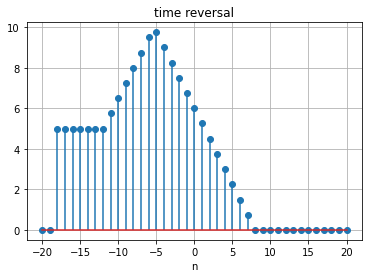

In [6]:
plt.stem(n,xn(-0.75*n-4))
plt.xlabel('n')
plt.title('time reversal')
plt.grid('on')
plt.show()

- 정의한 신호를 even function과 odd function으로 나누어 봅니다.

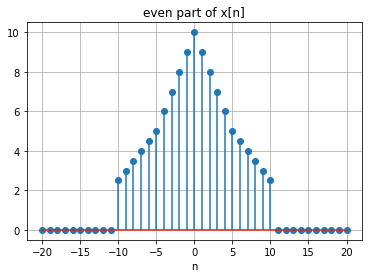

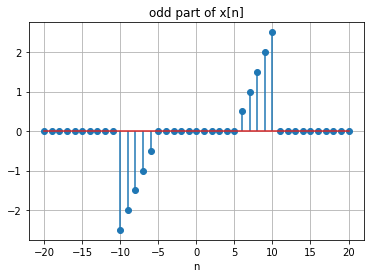

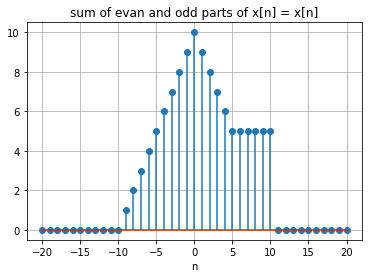

In [7]:
xe = 0.5 * (xn(n) + xn(-n))
xo = 0.5 * (xn(n) - xn(-n))

plt.stem(n,xe)
plt.xlabel('n')
plt.title('even part of x[n]')
plt.grid('on')
plt.show()

plt.stem(n,xo)
plt.xlabel('n')
plt.title('odd part of x[n]')
plt.grid('on')
plt.show()

plt.stem(n,xe + xo)
plt.xlabel('n')
plt.title('sum of evan and odd parts of x[n] = x[n]')
plt.grid('on')
plt.show()

### Step & Impulse Sequence
- unit step signal, unit impulse signal을 정의하고 시각화해봅니다.

In [8]:
def us(n):
    x = np.zeros(np.shape(n))
    x[n>=0] = 1
    return x

def ui(n):
    x = np.zeros(np.shape(n))
    x[n==0] = 1
    return x    

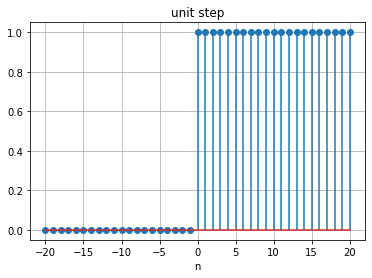

In [9]:
plt.stem(n,us(n))
plt.xlabel('n')
plt.title('unit step')
plt.grid('on')
plt.show()

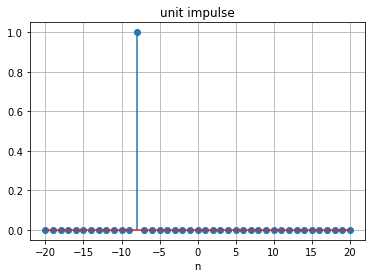

In [10]:
plt.stem(n,ui(n+8))
plt.xlabel('n')
plt.title('unit impulse')
plt.grid('on')
plt.show()

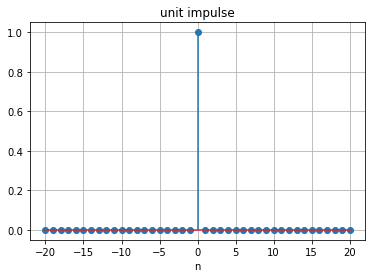

In [11]:
plt.stem(n,us(n)-us(n-1))
plt.xlabel('n')
plt.title('unit impulse')
plt.grid('on')
plt.show()

### Discrete-Time Complex Exponential Signals
- complex exponential signal을 정의하고, 다양한 경우의 신호를 관찰해봅니다.
- python에서 imaginary number는 j를 뒤에 붙여 표현할 수 있습니다.
- exponential, sine, cosine function은 math, numpy 라이브러리 등을 통해 쉽게 활용할 수 있습니다.

In [12]:
C = 1 + 2j
print(C)

(1+2j)


In [13]:
print(math.cos(math.pi))
print(np.cos(np.pi))
print(np.exp(2j))

-1.0
-1.0
(-0.4161468365471424+0.9092974268256817j)


- 일반적인 complex exponential signal을 정의하여, 다양한 C와 alpha에 대한 signal을 시각화하여 봅니다.

In [14]:
def xn(n,C,alpha):
    x = np.zeros(n.shape)
    x = C * np.power(alpha,n)
    return x

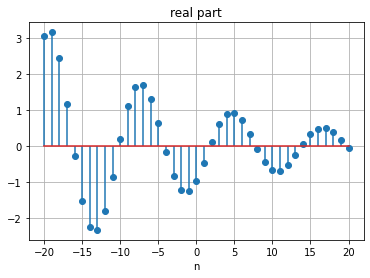

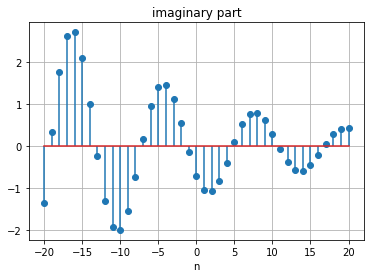

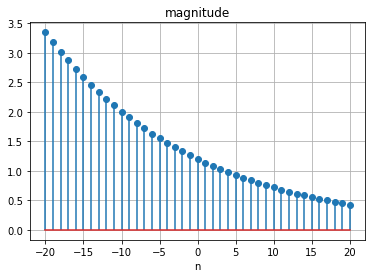

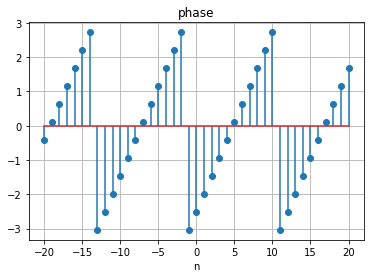

In [15]:
absC = 1.2
absA = 0.95
phaseC = (np.pi)*(1.2)
phaseA = (np.pi)*(2/12)

C = absC * np.exp(phaseC*1j)
A = absA * np.exp(phaseA*1j)

k = xn(n, C, A)

plt.stem(n,np.real(k))
plt.xlabel('n')
plt.title('real part')
plt.grid('on')
plt.show()

plt.stem(n,np.imag(k))
plt.xlabel('n')
plt.title('imaginary part')
plt.grid('on')
plt.show()

plt.stem(n,np.abs(k))
plt.xlabel('n')
plt.title('magnitude')
plt.grid('on')
plt.show()

plt.stem(n,np.angle(k))
plt.xlabel('n')
plt.title('phase')
plt.grid('on')
plt.show()

- exp(jw0n)에 대해 다양한 w0에 대해 fundamental period가 어떻게 변하는지 살펴봅시다. 

In [16]:
def xn(n,w0):
    x = np.zeros(n.shape)
    x = np.exp(1j*w0*n)
    return x

In [17]:
N = 16
n = np.arange(-N,N)
n.shape

(32,)

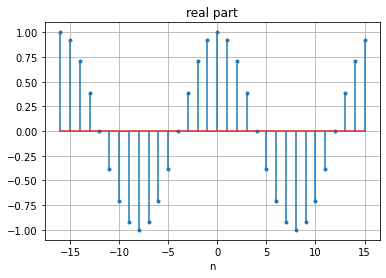

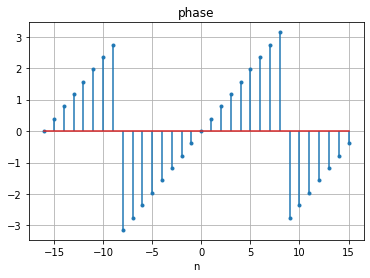

In [24]:
w0 = (np.pi)*(2/16)
k = xn(n,w0)
plt.stem(n,np.real(k), markerfmt='C0.')
plt.xlabel('n')
plt.title('real part')
plt.grid('on')
plt.show()

plt.stem(n,np.angle(k), markerfmt='C0.')
plt.xlabel('n')
plt.title('phase')
plt.grid('on')
plt.show()

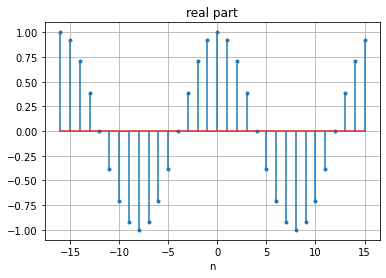

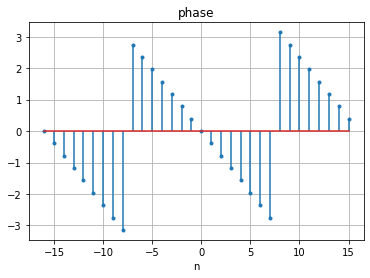

In [25]:
w0 = (np.pi)*(30/16)
k = xn(n,w0)
plt.stem(n,np.real(k), markerfmt='C0.')
plt.xlabel('n')
plt.title('real part')
plt.grid('on')
plt.show()

plt.stem(n,np.angle(k), markerfmt='C0.')
plt.xlabel('n')
plt.title('phase')
plt.grid('on')
plt.show()